In [1]:
import pandas as pd
import matplotlib as plt
import json
import os

In [2]:
def split_path(path: str):
    # Remove .json
    path = path[:-5]
    parts = path.split("__")
    return {"strategy": parts[0], "dataset": parts[1], "pool_size": parts[2]}

def get_time_data(results):
    result_dfs = list()
    for path, datas in results.items():
        data = pd.concat([datas["solvers_times"], datas["trees_times"]])
        path_parts = split_path(path)
        data["strategy"] = path_parts["strategy"]
        data["dataset"] = path_parts["dataset"]
        data["pool_size"] = path_parts["pool_size"]

        result_dfs.append(data)
    return pd.concat(result_dfs) \
        .reset_index(names=["subject"], inplace=False) \
        .set_index(["dataset", "strategy", "pool_size", "subject"], inplace=False)

def get_count_data(results):
    result_dfs = list()
    for path, datas in results.items():
        data = datas["solvers_counts"]
        if "solve_count" in data.columns.to_list():
            data = data.transpose()
        path_parts = split_path(path)
        data["strategy"] = path_parts["strategy"]
        data["dataset"] = path_parts["dataset"]
        data["pool_size"] = path_parts["pool_size"]

        result_dfs.append(data)
    return pd.concat(result_dfs) \
        .reset_index(names=["subject"], inplace=False) \
        .set_index(["dataset", "strategy", "pool_size", "subject"], inplace=False)


In [3]:
target_paths = list()
for _, _, paths in os.walk("./evaluations/"):
    for path in paths:
        target_paths.append(path)


results = dict()
for path in target_paths:
    with open(f"./evaluations/{path}", "r") as f:
        results[path] = json.load(f)

results = {path: {key: pd.DataFrame(value) for key, value in data.items() if key != "cache"} for path, data in results.items()}
time_data = get_time_data(results)
time_data

25%  \
dataset                 strategy       pool_size subject                        
quicksort8logs.log_5000 exactnocopy    3000      creating            0.000011   
                                                 parsing             0.004318   
                                                 adding              0.004193   
                                                 checking            0.004029   
                                                 assertion_counting  0.034310   
...                                                                       ...   
                        ratio3_4nocopy 1000      adding              0.003632   
                                                 checking            0.003565   
                                                 assertion_counting  0.000028   
                                                 finding             0.000022   
                                                 insertion           0.000050   

                                                                          50%  \
dataset                 strategy       pool_size subject                        
quicksort8logs.log_5000 exactnocopy    3000      creating            0.000013   
                                                 parsing             0.006326   
                                                 adding              0.004492   
                                                 checking            0.009109   
                                                 assertion_counting  0.034310   
...                                                                       ...   
                        ratio3_4nocopy 1000      adding              0.004511   
                                                 checking            0.005212   
                                                 assertion_counting  0.000032   
                                                 finding             0.000048   
                                                 insertion           0.000145   

                                                                          75%  \
dataset                 strategy       pool_size subject                        
quicksort8logs.log_5000 exactnocopy    3000      creating            0.000015   
                                                 parsing             0.008197   
                                                 adding              0.004906   
                                                 checking            0.011269   
                                                 assertion_counting  0.034310   
...                                                                       ...   
                        ratio3_4nocopy 1000      adding              0.005020   
                                                 checking            0.011551   
                                                 assertion_counting  0.000037   
                                                 finding             0.000139   
                                                 insertion           0.000263   

                                                                          max  \
dataset                 strategy       pool_size subject                        
quicksort8logs.log_5000 exactnocopy    3000      creating            0.009762   
                                                 parsing             0.796909   
                                                 adding              2.645822   
                                                 checking            0.805309   
                                                 assertion_counting  0.034310   
...                                                                       ...   
                        ratio3_4nocopy 1000      adding              0.242023   
                                                 checking            0.595714   
                                                 assertion_counting  0.022368   
                     

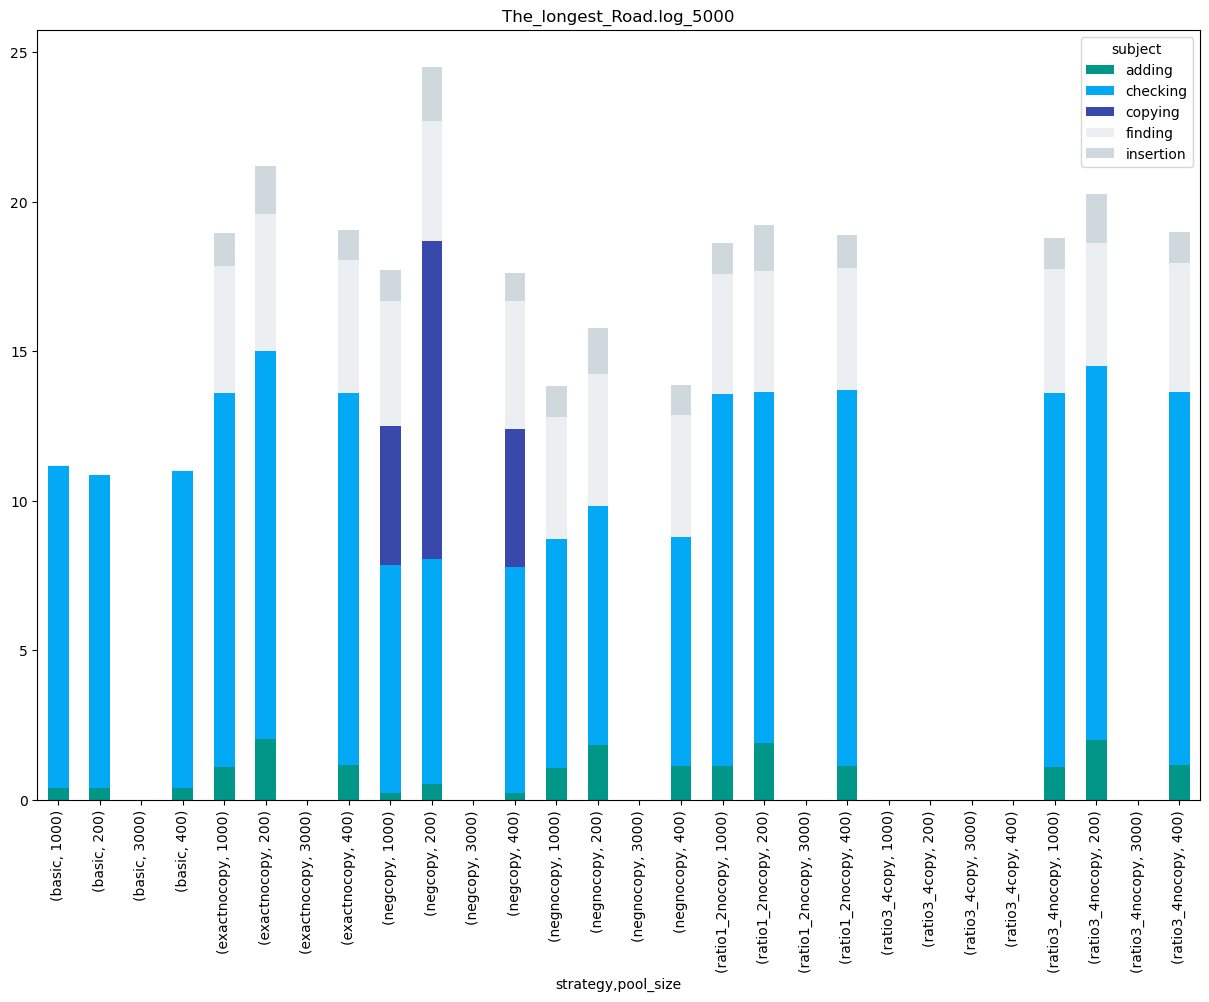

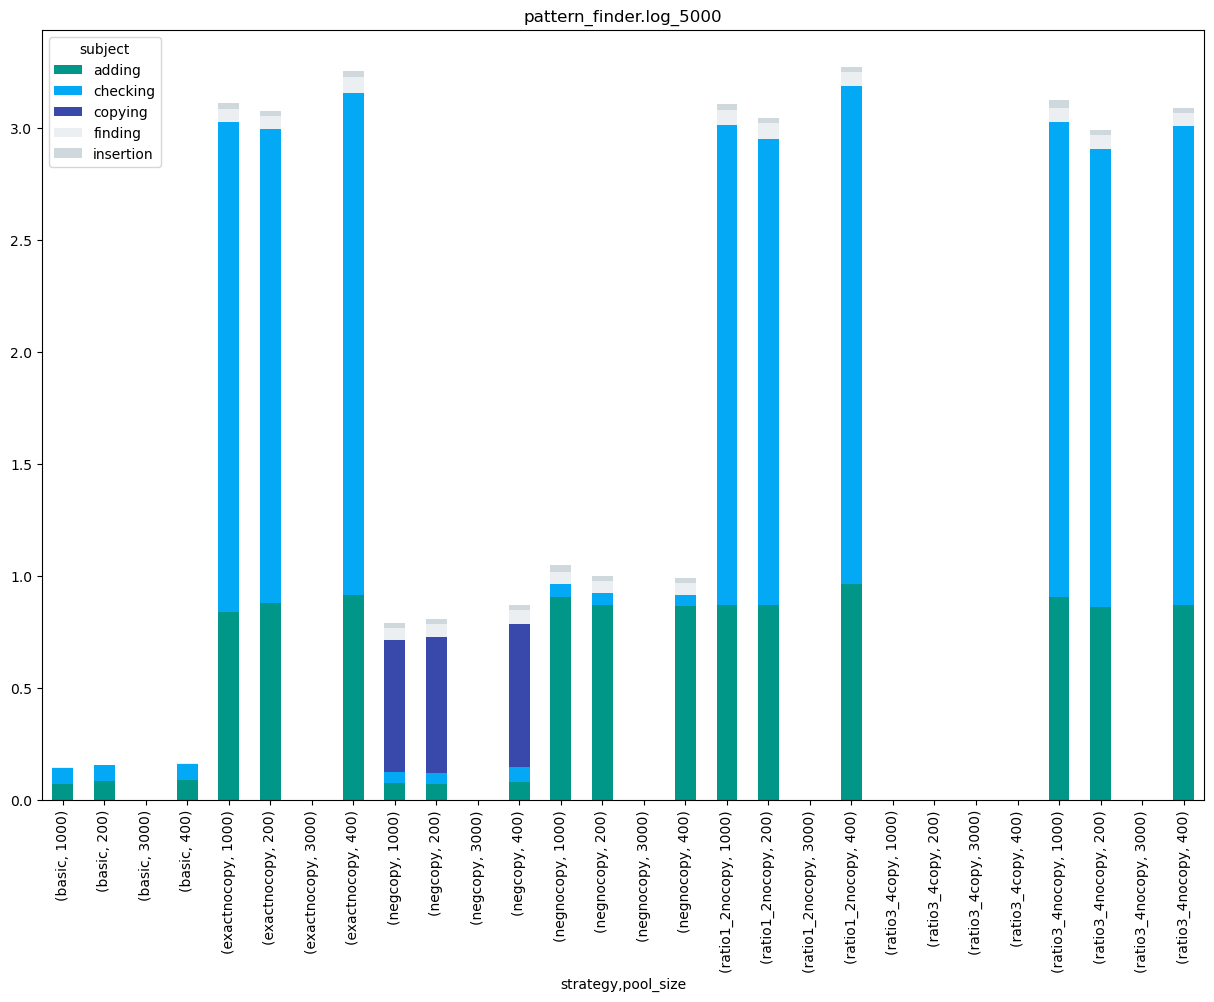

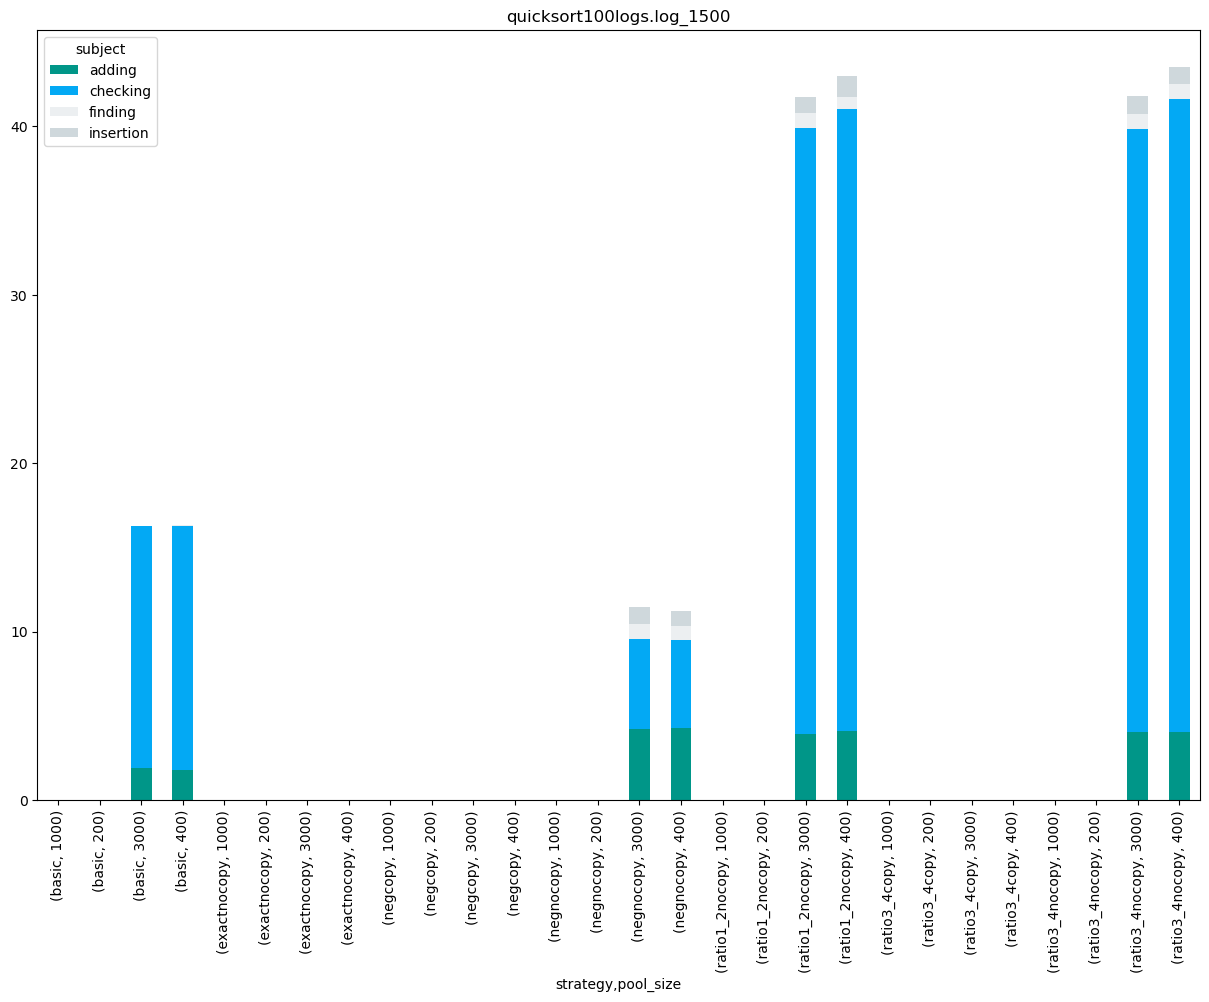

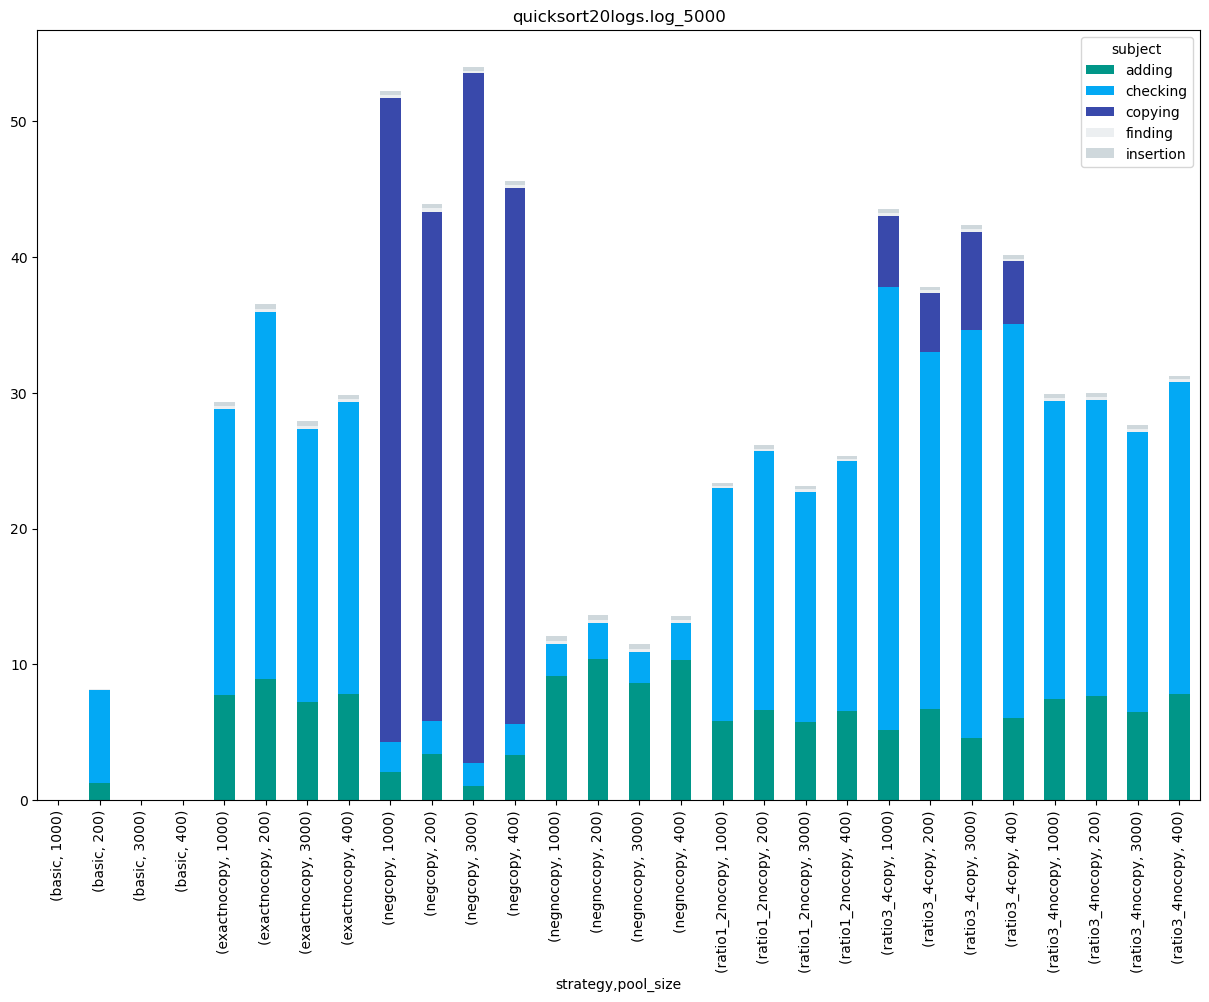

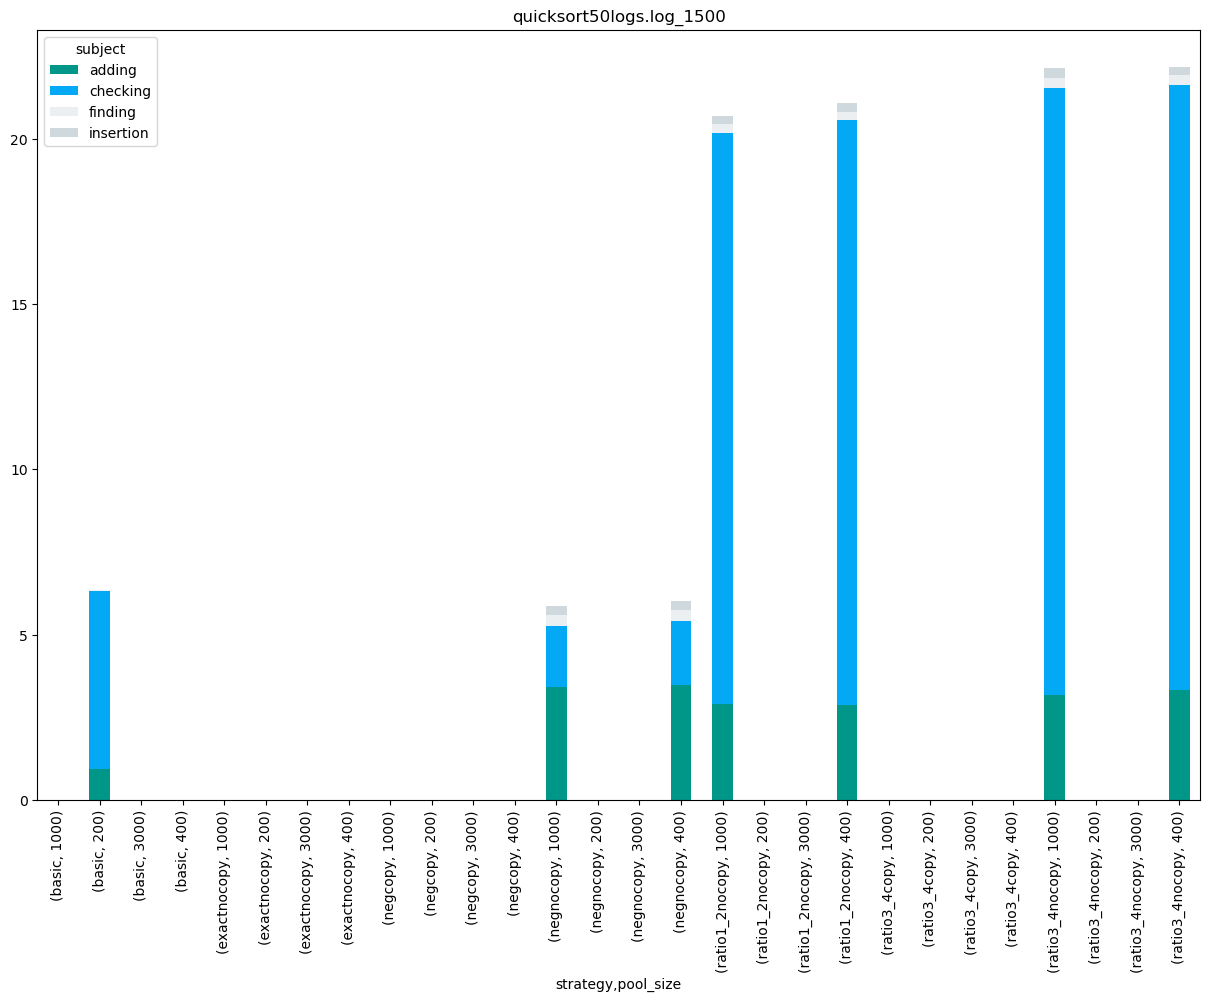

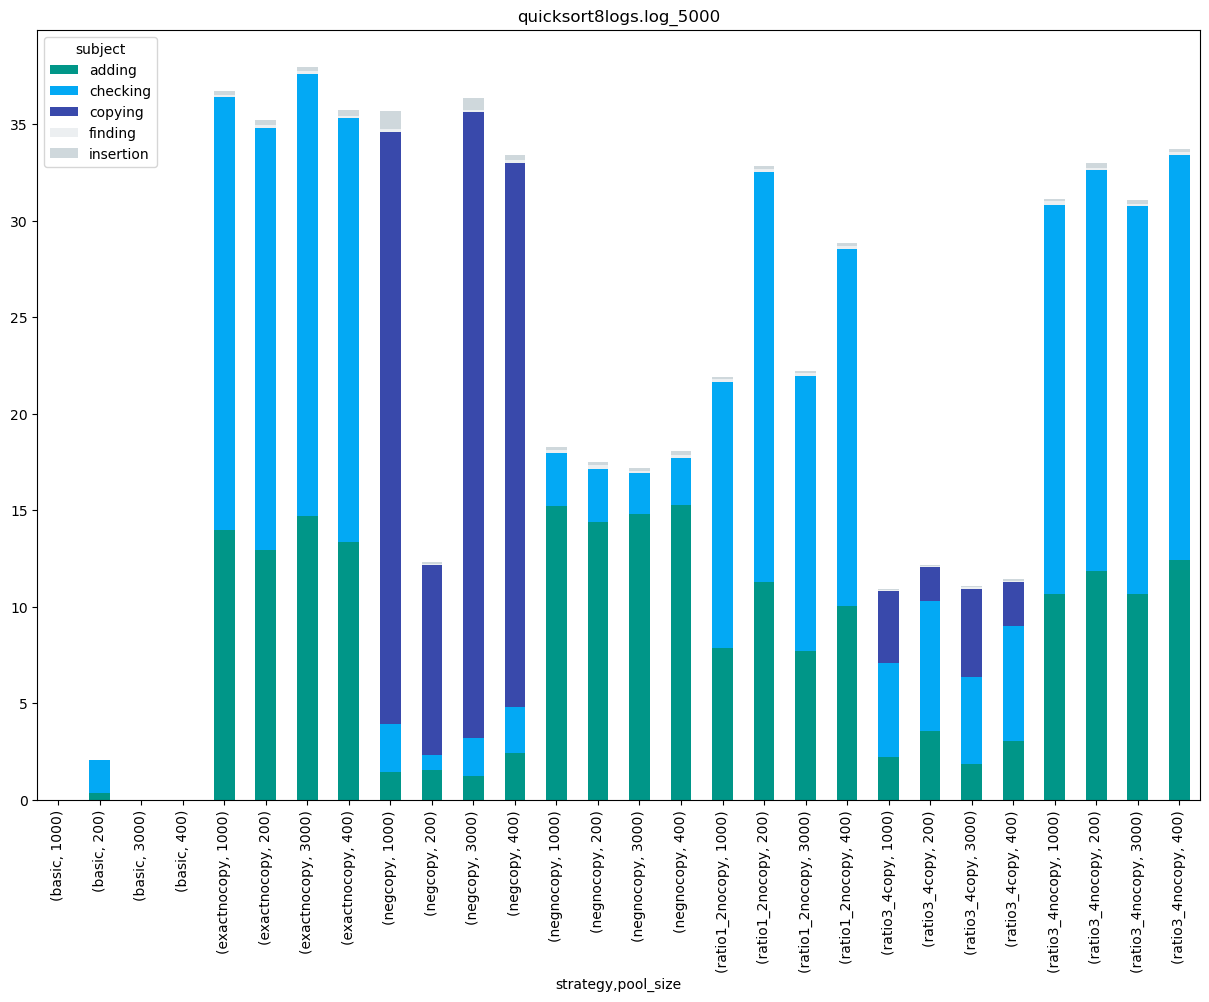

In [10]:
time_sum_data = time_data[["sum"]].pivot_table(
    index=["dataset", "strategy", "pool_size"], columns=["subject"])
time_sum_data.columns = time_sum_data.columns.droplevel(0)
time_sum_data = time_sum_data[[
    "adding", "checking", "copying", "finding", "insertion"]]
time_sum_data = time_sum_data.pivot_table(
    index=["strategy", "pool_size"], columns=["dataset"])
time_sum_data.columns = time_sum_data.columns.swaplevel(0, 1)
for dataset in time_sum_data.columns.levels[0]:
    time_sum_data[dataset].plot.bar(stacked=True, title=dataset, color={
                                    "adding": "#009688", "checking": "#03A9F4", "copying": "#3949AB", "finding": "#ECEFF1", "insertion": "#CFD8DC"},
                                    figsize=(15, 10))


In [5]:
get_count_data(results)[["mean"]].loc["quicksort50logs.log_1500"]

mean
strategy       pool_size subject               
ratio3_4nocopy 400       solve_count   1.147028
                         push_count    0.269030
                         pop_count     0.269030
ratio1_2nocopy 400       solve_count   1.159115
                         push_count    0.279241
                         pop_count     0.279241
basic          200       solve_count  13.580247
                         push_count   13.580247
                         pop_count    13.580247
ratio1_2nocopy 1000      solve_count   1.323706
                         push_count    0.324910
                         pop_count     0.324910
ratio3_4nocopy 1000      solve_count   1.309524
                         push_count    0.310714
                         pop_count     0.310714
negnocopy      1000      solve_count   1.268743
                         push_count    1.267589
                         pop_count     1.267589
               400       solve_count   1.116751
                         push_count    1.115736
                         pop_count     1.115736